In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
import pandas as pd

# Load the parquet data
df = pd.read_parquet('train_data.parquet')

# Display the loaded data
df.head()


,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008092,NaN
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-03,2,20,0.008092,NaN
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,NaN,NaN,0.0,2.0,4,4,5,5,4,2013-01-04,3,19,0.008092,NaN
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,NaN,NaN,2.0,0.0,4,4,5,5,4,2013-01-07,4,18,0.008092,NaN
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-08,5,17,0.008092,NaN


df['main_channel'] is a categorical datatype

In [3]:
df['main_channel'].unique()

[NaN, 'RETAIL', 'HOSPITAL', 'OTHERS', 'COMBINED']
Categories (4, object): ['COMBINED', 'HOSPITAL', 'OTHERS', 'RETAIL']

Issue: not sure what df['main_channel'] = 'COMBINED'

<p>feature descriptions:
   <li>Brand: Identifies the brand associated with the data.
   <li>Country: Represents the country associated with the brand.
   <li>Date: Specifies the date of the recorded data.
   <li>dayweek: Indicates the day of the week for a given date.
   <li>n_nwd_bef: Indicates number of no work days before
   <li>n_nwd_after: Indicates number of no work days after
   <li>wd: Represents the number of the working date within the month.
   <li>wd_left : Represents the number of the working date left within the month.
   <li>wd_perc : ?
   <li>ther_area: Provides information about the therapeutic area to which the
country-brand belongs.
   <li>hospital_rate: ?
   <li>n_weekday_0/1/2/3/4: ?
   <li>monthly: ?
   <li>main_channel: Specifies the main distribution channel for the country-brand.
   
<p>
<p>target variable
    <li>Phasing: The proportion of sales for a specific day relative to the total sales in the month. The sum of phases for the same month and country-brand combination should be equal to one.

In [4]:
df[(df['main_channel'] == 'RETAIL')]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
5090,AMOKR,0.000000,Aldovia,4.0,9.0,0.052632,S,0.000084,0.0,0.0,6,8,8,8,10,2017-09-01,1,18,0.023259,RETAIL
5091,AMOKR,0.037918,Aldovia,0.0,9.0,0.105263,S,0.000084,4.0,0.0,6,8,8,8,10,2017-09-04,2,17,0.023259,RETAIL
5092,AMOKR,0.046691,Aldovia,1.0,9.0,0.157895,S,0.000084,0.0,0.0,6,8,8,8,10,2017-09-05,3,16,0.023259,RETAIL
5093,AMOKR,0.045043,Aldovia,2.0,9.0,0.210526,S,0.000084,0.0,0.0,6,8,8,8,10,2017-09-06,4,15,0.023259,RETAIL
5094,AMOKR,0.021709,Aldovia,3.0,9.0,0.263158,S,0.000084,0.0,0.0,6,8,8,8,10,2017-09-07,5,14,0.023259,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521036,ZKKLD,0.049943,Zamunda,3.0,12.0,0.789474,R,0.000880,0.0,3.0,4,4,3,5,3,2021-12-23,15,4,0.039834,RETAIL
3521037,ZKKLD,0.033827,Zamunda,0.0,12.0,0.842105,R,0.000880,3.0,0.0,4,4,3,5,3,2021-12-27,16,3,0.039834,RETAIL
3521038,ZKKLD,0.005815,Zamunda,1.0,12.0,0.894737,R,0.000880,0.0,0.0,4,4,3,5,3,2021-12-28,17,2,0.039834,RETAIL
3521039,ZKKLD,0.000013,Zamunda,2.0,12.0,0.947368,R,0.000880,0.0,0.0,4,4,3,5,3,2021-12-29,18,1,0.039834,RETAIL


In [5]:
df[(df['main_channel'].isnull()) & (df['hospital_rate'].isnull())]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008092,NaN
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-03,2,20,0.008092,NaN
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,NaN,NaN,0.0,2.0,4,4,5,5,4,2013-01-04,3,19,0.008092,NaN
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,NaN,NaN,2.0,0.0,4,4,5,5,4,2013-01-07,4,18,0.008092,NaN
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-08,5,17,0.008092,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525877,ZVLFE,0.010716,Zamunda,0.0,9.0,0.818182,M,NaN,2.0,0.0,4,4,4,5,5,2016-09-26,18,4,0.010540,NaN
3525878,ZVLFE,0.042210,Zamunda,1.0,9.0,0.863636,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-27,19,3,0.010540,NaN
3525879,ZVLFE,0.051639,Zamunda,2.0,9.0,0.909091,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-28,20,2,0.010540,NaN
3525880,ZVLFE,0.065464,Zamunda,3.0,9.0,0.954545,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-29,21,1,0.010540,NaN


So wherever the main_channel source is unknown the hospital rate is unknown as well.

In [6]:
df[(df['main_channel'].isnull()) & (df['hospital_rate'].isnull())]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008092,NaN
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-03,2,20,0.008092,NaN
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,NaN,NaN,0.0,2.0,4,4,5,5,4,2013-01-04,3,19,0.008092,NaN
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,NaN,NaN,2.0,0.0,4,4,5,5,4,2013-01-07,4,18,0.008092,NaN
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-08,5,17,0.008092,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525877,ZVLFE,0.010716,Zamunda,0.0,9.0,0.818182,M,NaN,2.0,0.0,4,4,4,5,5,2016-09-26,18,4,0.010540,NaN
3525878,ZVLFE,0.042210,Zamunda,1.0,9.0,0.863636,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-27,19,3,0.010540,NaN
3525879,ZVLFE,0.051639,Zamunda,2.0,9.0,0.909091,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-28,20,2,0.010540,NaN
3525880,ZVLFE,0.065464,Zamunda,3.0,9.0,0.954545,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-29,21,1,0.010540,NaN


In [7]:
# Assuming 'df' is your DataFrame
#df[(df['main_channel'] == 'RETAIL') & (df['hospital_rate'].isnull())]
# Assuming you have already imported pandas as pd
# and your DataFrame is named df

df[(df['main_channel'] == 'RETAIL') & (df['hospital_rate'].notnull())]


,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
5090,AMOKR,0.000000,Aldovia,4.0,9.0,0.052632,S,0.000084,0.0,0.0,6,8,8,8,10,2017-09-01,1,18,0.023259,RETAIL
5091,AMOKR,0.037918,Aldovia,0.0,9.0,0.105263,S,0.000084,4.0,0.0,6,8,8,8,10,2017-09-04,2,17,0.023259,RETAIL
5092,AMOKR,0.046691,Aldovia,1.0,9.0,0.157895,S,0.000084,0.0,0.0,6,8,8,8,10,2017-09-05,3,16,0.023259,RETAIL
5093,AMOKR,0.045043,Aldovia,2.0,9.0,0.210526,S,0.000084,0.0,0.0,6,8,8,8,10,2017-09-06,4,15,0.023259,RETAIL
5094,AMOKR,0.021709,Aldovia,3.0,9.0,0.263158,S,0.000084,0.0,0.0,6,8,8,8,10,2017-09-07,5,14,0.023259,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521036,ZKKLD,0.049943,Zamunda,3.0,12.0,0.789474,R,0.000880,0.0,3.0,4,4,3,5,3,2021-12-23,15,4,0.039834,RETAIL
3521037,ZKKLD,0.033827,Zamunda,0.0,12.0,0.842105,R,0.000880,3.0,0.0,4,4,3,5,3,2021-12-27,16,3,0.039834,RETAIL
3521038,ZKKLD,0.005815,Zamunda,1.0,12.0,0.894737,R,0.000880,0.0,0.0,4,4,3,5,3,2021-12-28,17,2,0.039834,RETAIL
3521039,ZKKLD,0.000013,Zamunda,2.0,12.0,0.947368,R,0.000880,0.0,0.0,4,4,3,5,3,2021-12-29,18,1,0.039834,RETAIL


In [8]:
df

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008092,NaN
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-03,2,20,0.008092,NaN
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,NaN,NaN,0.0,2.0,4,4,5,5,4,2013-01-04,3,19,0.008092,NaN
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,NaN,NaN,2.0,0.0,4,4,5,5,4,2013-01-07,4,18,0.008092,NaN
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-08,5,17,0.008092,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525877,ZVLFE,0.010716,Zamunda,0.0,9.0,0.818182,M,NaN,2.0,0.0,4,4,4,5,5,2016-09-26,18,4,0.010540,NaN
3525878,ZVLFE,0.042210,Zamunda,1.0,9.0,0.863636,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-27,19,3,0.010540,NaN
3525879,ZVLFE,0.051639,Zamunda,2.0,9.0,0.909091,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-28,20,2,0.010540,NaN
3525880,ZVLFE,0.065464,Zamunda,3.0,9.0,0.954545,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-29,21,1,0.010540,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812490 entries, 0 to 3525881
Data columns (total 20 columns):
 #   Column         Dtype         
---  ------         -----         
 0   brand          object        
 1   phase          float64       
 2   country        object        
 3   dayweek        float64       
 4   month          float64       
 5   wd_perc        float64       
 6   ther_area      category      
 7   hospital_rate  float64       
 8   n_nwd_bef      float64       
 9   n_nwd_aft      float64       
 10  n_weekday_0    int64         
 11  n_weekday_1    int64         
 12  n_weekday_2    int64         
 13  n_weekday_3    int64         
 14  n_weekday_4    int64         
 15  date           datetime64[ns]
 16  wd             int64         
 17  wd_left        int64         
 18  monthly        float64       
 19  main_channel   category      
dtypes: category(2), datetime64[ns](1), float64(8), int64(7), object(2)
memory usage: 413.1+ MB


In [10]:
df.isnull().sum()


brand                 0
phase                 0
country               0
dayweek               0
month                 0
wd_perc               0
ther_area        356445
hospital_rate    504994
n_nwd_bef             0
n_nwd_aft             0
n_weekday_0           0
n_weekday_1           0
n_weekday_2           0
n_weekday_3           0
n_weekday_4           0
date                  0
wd                    0
wd_left               0
monthly               0
main_channel     504994
dtype: int64

In [11]:
max_phase_row = df["phase"].idxmax()
df.loc[max_phase_row]

brand                          DKNSS
phase                       0.920948
country                        Dorne
dayweek                          2.0
month                           12.0
wd_perc                          1.0
ther_area                          R
hospital_rate                    0.0
n_nwd_bef                        0.0
n_nwd_aft                       11.0
n_weekday_0                        3
n_weekday_1                        4
n_weekday_2                        4
n_weekday_3                        3
n_weekday_4                        3
date             2020-12-23 00:00:00
wd                                17
wd_left                            0
monthly                     0.049944
main_channel                  RETAIL
Name: 1033200, dtype: object

In [12]:
df['date'].dtypes

dtype('<M8[ns]')

<Axes: xlabel='date', ylabel='phase'>

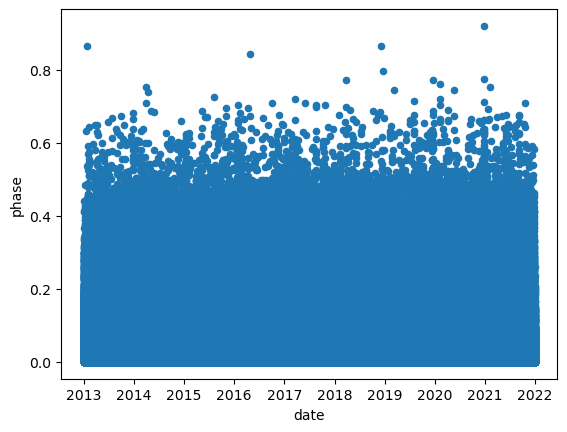

In [13]:
df.plot(x='date', y='phase', kind='scatter')


<Axes: title={'center': 'phase'}, xlabel='date'>

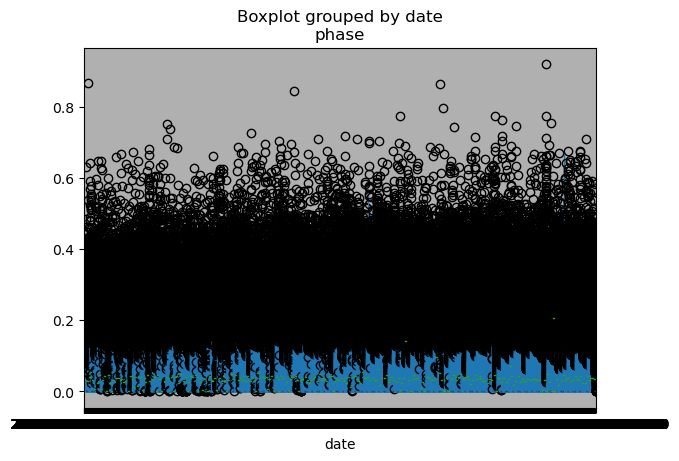

In [14]:
df.boxplot(column='phase', by='date')


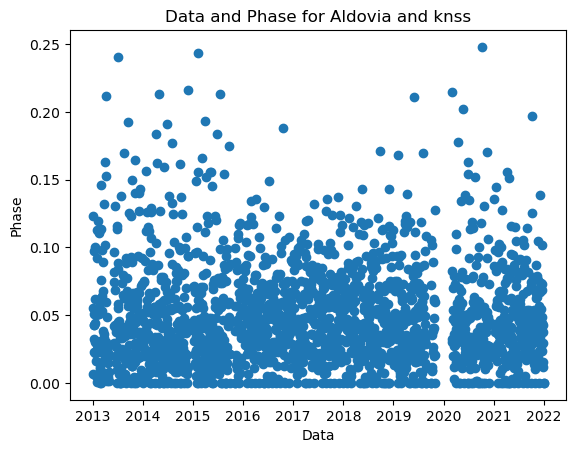

In [15]:


# Filter the dataframe
filtered_df = df[(df['country'] == 'Aldovia') & (df['brand'] == 'AIMST')]

# Plot the data and phase
plt.scatter(filtered_df['date'], filtered_df['phase'])
plt.xlabel('Data')
plt.ylabel('Phase')
plt.title('Data and Phase for Aldovia and knss')
plt.show()

In [16]:
filtered_df[filtered_df.isnull().any(axis=1)]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008092,NaN
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-03,2,20,0.008092,NaN
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,NaN,NaN,0.0,2.0,4,4,5,5,4,2013-01-04,3,19,0.008092,NaN
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,NaN,NaN,2.0,0.0,4,4,5,5,4,2013-01-07,4,18,0.008092,NaN
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-08,5,17,0.008092,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,AIMST,0.029592,Aldovia,0.0,12.0,0.809524,NaN,NaN,2.0,0.0,3,4,4,5,5,2021-12-27,17,4,0.003069,NaN
2038,AIMST,0.042513,Aldovia,1.0,12.0,0.857143,NaN,NaN,0.0,0.0,3,4,4,5,5,2021-12-28,18,3,0.003069,NaN
2039,AIMST,0.011557,Aldovia,2.0,12.0,0.904762,NaN,NaN,0.0,0.0,3,4,4,5,5,2021-12-29,19,2,0.003069,NaN
2040,AIMST,0.000000,Aldovia,3.0,12.0,0.952381,NaN,NaN,0.0,0.0,3,4,4,5,5,2021-12-30,20,1,0.003069,NaN


<Axes: title={'center': 'Phase for Aldovia'}, ylabel='Frequency'>

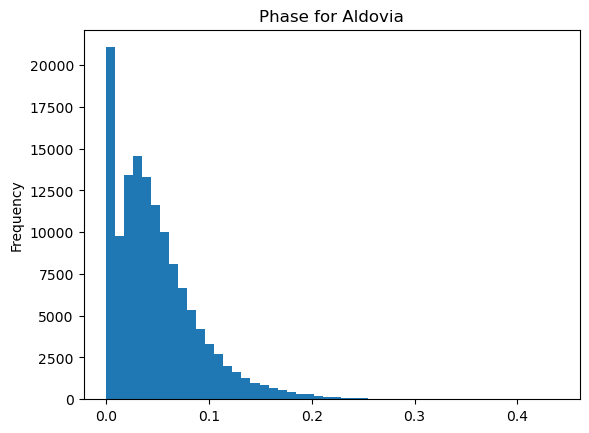

In [17]:
df.loc[df['country'] == 'Aldovia', 'phase'].plot(kind='hist', bins=50, title='Phase for Aldovia')

In [18]:
df[(df['brand'] == 'DKNSS') & (df['country'] == 'Dorne') & (df['date'].dt.year == 2020) & (df['date'].dt.month == 12)]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
1033184,DKNSS,0.000000,Dorne,1.0,12.0,0.058824,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-01,1,16,0.049944,RETAIL
1033185,DKNSS,0.000000,Dorne,2.0,12.0,0.117647,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-02,2,15,0.049944,RETAIL
1033186,DKNSS,0.000000,Dorne,3.0,12.0,0.176471,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-03,3,14,0.049944,RETAIL
1033187,DKNSS,0.072765,Dorne,4.0,12.0,0.235294,R,0.0,0.0,2.0,3,4,4,3,3,2020-12-04,4,13,0.049944,RETAIL
1033188,DKNSS,0.002625,Dorne,0.0,12.0,0.294118,R,0.0,2.0,0.0,3,4,4,3,3,2020-12-07,5,12,0.049944,RETAIL
1033189,DKNSS,0.003143,Dorne,1.0,12.0,0.352941,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-08,6,11,0.049944,RETAIL
1033190,DKNSS,0.000000,Dorne,2.0,12.0,0.411765,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-09,7,10,0.049944,RETAIL
1033191,DKNSS,0.000000,Dorne,3.0,12.0,0.470588,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-10,8,9,0.049944,RETAIL
1033192,DKNSS,0.000000,Dorne,4.0,12.0,0.529412,R,0.0,0.0,2.0,3,4,4,3,3,2020-12-11,9,8,0.049944,RETAIL
1033193,DKNSS,0.000000,Dorne,0.0,12.0,0.588235,R,0.0,2.0,0.0,3,4,4,3,3,2020-12-14,10,7,0.049944,RETAIL


In [19]:
df['year'] = df['date'].dt.year
df

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,...,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel,year
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,...,4,5,5,4,2013-01-02,1,21,0.008092,NaN,2013
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,NaN,NaN,0.0,0.0,...,4,5,5,4,2013-01-03,2,20,0.008092,NaN,2013
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,NaN,NaN,0.0,2.0,...,4,5,5,4,2013-01-04,3,19,0.008092,NaN,2013
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,NaN,NaN,2.0,0.0,...,4,5,5,4,2013-01-07,4,18,0.008092,NaN,2013
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,NaN,NaN,0.0,0.0,...,4,5,5,4,2013-01-08,5,17,0.008092,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525877,ZVLFE,0.010716,Zamunda,0.0,9.0,0.818182,M,NaN,2.0,0.0,...,4,4,5,5,2016-09-26,18,4,0.010540,NaN,2016
3525878,ZVLFE,0.042210,Zamunda,1.0,9.0,0.863636,M,NaN,0.0,0.0,...,4,4,5,5,2016-09-27,19,3,0.010540,NaN,2016
3525879,ZVLFE,0.051639,Zamunda,2.0,9.0,0.909091,M,NaN,0.0,0.0,...,4,4,5,5,2016-09-28,20,2,0.010540,NaN,2016
3525880,ZVLFE,0.065464,Zamunda,3.0,9.0,0.954545,M,NaN,0.0,0.0,...,4,4,5,5,2016-09-29,21,1,0.010540,NaN,2016


I need to check if the phasing adds up to 1 for each month for each country - brand

In [20]:
df_phase = df.groupby(['country', 'brand', 'year', 'month']).agg({'phase': 'sum'})
# Rename the aggregated column
df_phase = df_phase.rename(columns={'phase': 'phase_month'})
df_phase['phase_month'] = df_phase['phase_month'].round(2)
df_phase

phase_month
country brand year month             
Aldovia AIMST 2013 1.0            1.0
                   2.0            1.0
                   3.0            1.0
                   4.0            1.0
                   6.0            1.0
...                               ...
Zamunda ZVLFE 2016 5.0            1.0
                   6.0            1.0
                   7.0            1.0
                   8.0            1.0
                   9.0            1.0

[136807 rows x 1 columns]

In [21]:
df_phase = df_phase.reset_index()
df_phase

,country,brand,year,month,phase_month
0,Aldovia,AIMST,2013,1.0,1.0
1,Aldovia,AIMST,2013,2.0,1.0
2,Aldovia,AIMST,2013,3.0,1.0
3,Aldovia,AIMST,2013,4.0,1.0
4,Aldovia,AIMST,2013,6.0,1.0
...,...,...,...,...,...
136802,Zamunda,ZVLFE,2016,5.0,1.0
136803,Zamunda,ZVLFE,2016,6.0,1.0
136804,Zamunda,ZVLFE,2016,7.0,1.0
136805,Zamunda,ZVLFE,2016,8.0,1.0


In [22]:
len(df_phase['phase_month'].unique())

1

In [23]:
df_phase['phase_month'].unique()

array([1.])

Choosing one country and brand for initial analysis

In [24]:
#finding the name of the countries and brands
print(df['country'].unique())
print(df['brand'].unique())

['Aldovia' 'Arendelle' 'Arrakis' 'Asgard' 'Atlantis' 'Beleria' 'Braavos'
 'Coruscant' 'Dorne' 'Elbonia' 'Eriador' 'Essos' 'Etheria' 'Fangorn'
 'Ferelden' 'Gallifrey' 'Gondor' 'Hogwarts' 'Latveria' 'Narnia' 'Panem'
 'Prydain' 'Qarth' 'Sokovia' 'Themyscira' 'Vulcan' 'Wakanda' 'Westeros'
 'Yunkai' 'Zamunda']
['AIMST' 'AITPJ' 'AIZTT' 'AMOKR' 'BELQI' 'BNCPE' 'BQSIJ' 'BRQJC' 'BUMTY'
 'CCXTL' 'CDFFX' 'CQSEZ' 'DDRNC' 'DKGUK' 'DKNSS' 'DLOBM' 'DRGNL' 'DXGSD'
 'EAHGQ' 'EQZWB' 'ESVUF' 'EUESX' 'EUJWP' 'FIPNP' 'FLGPE' 'FNHPF' 'FUYDW'
 'GBWHQ' 'GIKKL' 'GUCEF' 'GYMRM' 'HGSMA' 'HGXNC' 'HHBXR' 'HIBSM' 'HJDCK'
 'HOIWJ' 'HPCEJ' 'HZCGL' 'ICPTW' 'IDMBR' 'IKGEA' 'IMUFR' 'IMVCZ' 'IYPIH'
 'JAZVP' 'JJVUD' 'JQKXY' 'JTOEV' 'KGUIR' 'KKZMZ' 'KMXBC' 'LCXHV' 'LFJNN'
 'LGFTN' 'LIIDH' 'LRHOW' 'LTOHO' 'MLKJM' 'MRHKP' 'NXPMK' 'OLVUY' 'OPRCW'
 'ORUVA' 'PEPBY' 'PIIFS' 'PJZBL' 'PLNDT' 'PMTEA' 'PRPVG' 'PUHXP' 'QGTFP'
 'QQPNT' 'QRLJM' 'QSNYX' 'QYGNN' 'QYPXJ' 'RBBLK' 'RHXQH' 'RRGHZ' 'RUJHO'
 'RWUKW' 'RXRWV' 'RYZCA' 'SOXJL' 'SX

In [25]:
df[(df['country']=='Themyscira') ]['brand'].unique()

array(['ABRRE', 'AITPJ', 'ARBSZ', 'BBIDC', 'BELQI', 'BNCPE', 'CCXTL',
       'CPHZR', 'CQSEZ', 'CXGRE', 'DKCQN', 'DKGUK', 'DLOBM', 'DRGNL',
       'EAHGQ', 'EQZWB', 'EUJWP', 'FIPNP', 'FLGPE', 'FULHM', 'FUYDW',
       'GIKKL', 'GUCEF', 'GYMRM', 'HGSMA', 'HGXNC', 'HHBXR', 'HIBSM',
       'HJDCK', 'HTRHP', 'HZCGL', 'ICPTW', 'IDMBR', 'IMUFR', 'IMVCZ',
       'IYPIH', 'JAZVP', 'JJVUD', 'JQKXY', 'JTOEV', 'KCYIY', 'KGUIR',
       'KKZMZ', 'LCXHV', 'LFJNN', 'LGFTN', 'LIIDH', 'MRHKP', 'NXPMK',
       'OHQVL', 'OLVUY', 'OPRCW', 'PJZBL', 'PLNDT', 'PRPVG', 'PUHXP',
       'QGTFP', 'QQPNT', 'QQRPF', 'QRLJM', 'QROZQ', 'QYGNN', 'RHXQH',
       'ROQMN', 'RUJHO', 'RWUKW', 'RYZCA', 'SOXJL', 'SXOQX', 'TFRIZ',
       'TOJGV', 'TXYQX', 'UXMKF', 'UYELK', 'VCWIO', 'VDVBR', 'VKOXM',
       'VLQRF', 'VXLPO', 'WOXYE', 'WUOIM', 'XLTUE', 'XLXNS', 'XMLDV',
       'YOWYI', 'YSYFA', 'ZAKZS', 'ZHQFB', 'ZKKLD', 'ZKMVW', 'ZNDRT'],
      dtype=object)

In [26]:
df_themy = df[(df['country']=='Themyscira') & (df['brand']=='EUJWP')]

In [27]:
#Checking for null cases
df_themy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 2831817 to 2833065
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   brand          1249 non-null   object        
 1   phase          1249 non-null   float64       
 2   country        1249 non-null   object        
 3   dayweek        1249 non-null   float64       
 4   month          1249 non-null   float64       
 5   wd_perc        1249 non-null   float64       
 6   ther_area      1249 non-null   category      
 7   hospital_rate  1249 non-null   float64       
 8   n_nwd_bef      1249 non-null   float64       
 9   n_nwd_aft      1249 non-null   float64       
 10  n_weekday_0    1249 non-null   int64         
 11  n_weekday_1    1249 non-null   int64         
 12  n_weekday_2    1249 non-null   int64         
 13  n_weekday_3    1249 non-null   int64         
 14  n_weekday_4    1249 non-null   int64         
 15  date        

<Axes: xlabel='date', ylabel='phase'>

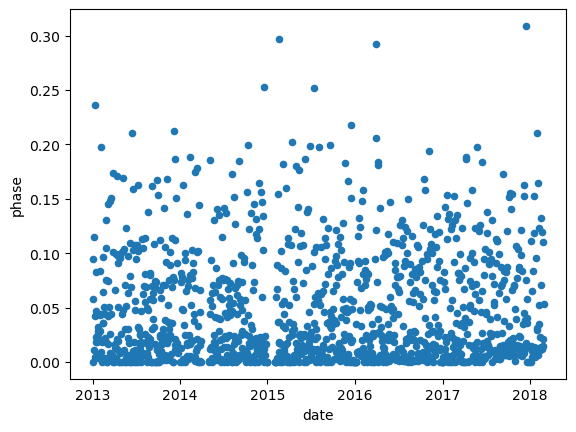

In [28]:
df_themy.plot(x='date', y='phase', kind='scatter')

In [30]:
df_themy

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,...,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel,year
2831817,EUJWP,0.000000,Themyscira,2.0,1.0,0.045455,A,0.00757,11.0,0.0,...,4,5,5,4,2013-01-02,1,21,0.064667,RETAIL,2013
2831818,EUJWP,0.057841,Themyscira,3.0,1.0,0.090909,A,0.00757,0.0,0.0,...,4,5,5,4,2013-01-03,2,20,0.064667,RETAIL,2013
2831819,EUJWP,0.094534,Themyscira,4.0,1.0,0.136364,A,0.00757,0.0,2.0,...,4,5,5,4,2013-01-04,3,19,0.064667,RETAIL,2013
2831820,EUJWP,0.011172,Themyscira,0.0,1.0,0.181818,A,0.00757,2.0,0.0,...,4,5,5,4,2013-01-07,4,18,0.064667,RETAIL,2013
2831821,EUJWP,0.114971,Themyscira,1.0,1.0,0.227273,A,0.00757,0.0,0.0,...,4,5,5,4,2013-01-08,5,17,0.064667,RETAIL,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833061,EUJWP,0.119752,Themyscira,2.0,2.0,0.789474,A,0.00757,0.0,0.0,...,8,8,8,8,2018-02-21,15,4,0.045623,RETAIL,2018
2833062,EUJWP,0.110119,Themyscira,3.0,2.0,0.842105,A,0.00757,0.0,0.0,...,8,8,8,8,2018-02-22,16,3,0.045623,RETAIL,2018
2833063,EUJWP,0.014874,Themyscira,4.0,2.0,0.894737,A,0.00757,0.0,4.0,...,8,8,8,8,2018-02-23,17,2,0.045623,RETAIL,2018
2833064,EUJWP,0.021526,Themyscira,0.0,2.0,0.947368,A,0.00757,0.0,0.0,...,8,8,8,8,2018-02-26,18,1,0.045623,RETAIL,2018


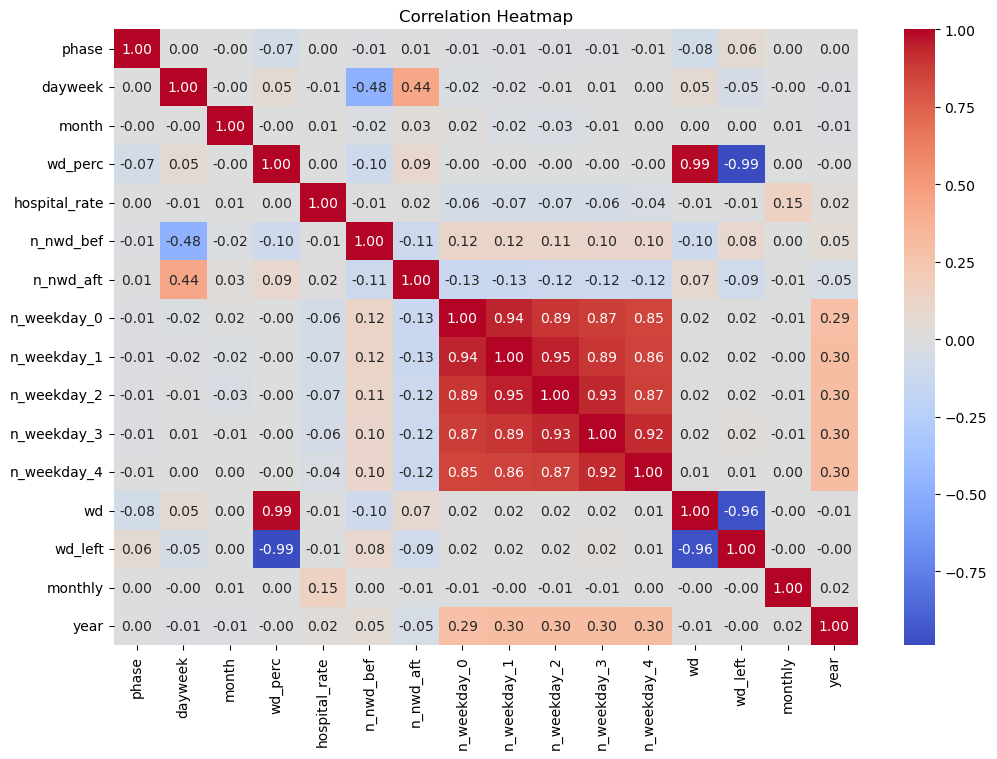

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Select only the relevant columns for correlation
# Adjust the column list based on your specific DataFrame
numeric_cols = ['phase', 'dayweek', 'month', 'wd_perc', 'hospital_rate',
                'n_nwd_bef', 'n_nwd_aft', 'n_weekday_0', 'n_weekday_1', 
                'n_weekday_2', 'n_weekday_3', 'n_weekday_4', 'wd', 
                'wd_left', 'monthly', 'year']

# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='date', ylabel='phase'>

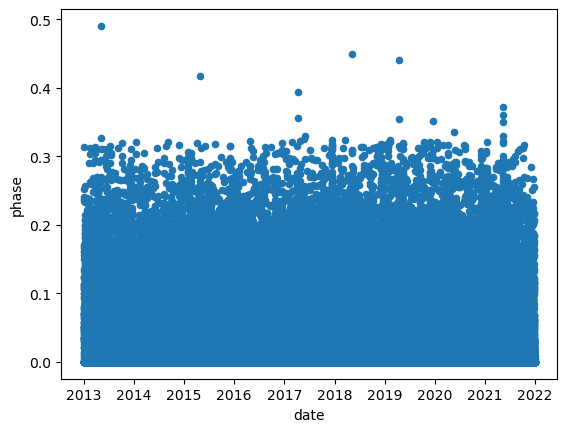

In [31]:
df[df['country']=='Themyscira'].plot(x='date', y='phase', kind='scatter')

In [32]:
df_themyscrira=df[df['country']=='Themyscira']
df_themyscrira.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106006 entries, 2807460 to 2936654
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   brand          106006 non-null  object        
 1   phase          106006 non-null  float64       
 2   country        106006 non-null  object        
 3   dayweek        106006 non-null  float64       
 4   month          106006 non-null  float64       
 5   wd_perc        106006 non-null  float64       
 6   ther_area      97754 non-null   category      
 7   hospital_rate  93019 non-null   float64       
 8   n_nwd_bef      106006 non-null  float64       
 9   n_nwd_aft      106006 non-null  float64       
 10  n_weekday_0    106006 non-null  int64         
 11  n_weekday_1    106006 non-null  int64         
 12  n_weekday_2    106006 non-null  int64         
 13  n_weekday_3    106006 non-null  int64         
 14  n_weekday_4    106006 non-null  int64        

In [33]:
df_themyscrira.drop(columns=['main_channel','hospital_rate', 'ther_area'],inplace=True)
df_themyscrira.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106006 entries, 2807460 to 2936654
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   brand        106006 non-null  object        
 1   phase        106006 non-null  float64       
 2   country      106006 non-null  object        
 3   dayweek      106006 non-null  float64       
 4   month        106006 non-null  float64       
 5   wd_perc      106006 non-null  float64       
 6   n_nwd_bef    106006 non-null  float64       
 7   n_nwd_aft    106006 non-null  float64       
 8   n_weekday_0  106006 non-null  int64         
 9   n_weekday_1  106006 non-null  int64         
 10  n_weekday_2  106006 non-null  int64         
 11  n_weekday_3  106006 non-null  int64         
 12  n_weekday_4  106006 non-null  int64         
 13  date         106006 non-null  datetime64[ns]
 14  wd           106006 non-null  int64         
 15  wd_left      106006 non-nul

/var/folders/dz/j5wssbrn5m11y98nkbpt60kr0000gn/T/ipykernel_48141/3383393727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_themyscrira.drop(columns=['main_channel','hospital_rate', 'ther_area'],inplace=True)


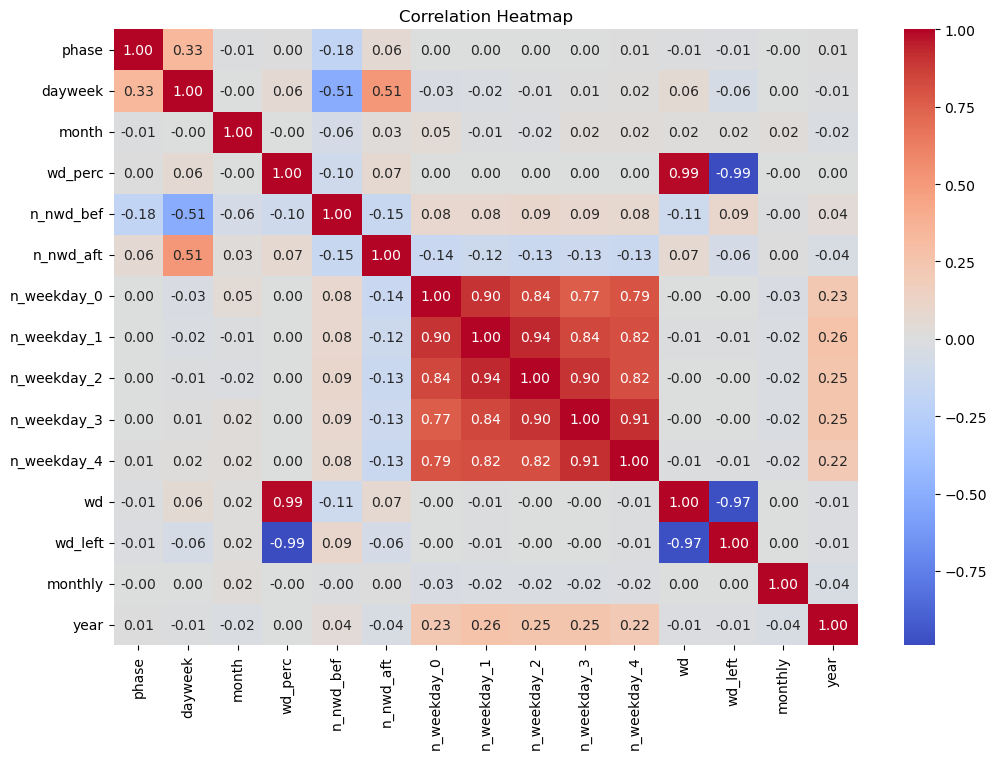

In [34]:
# Assuming your DataFrame is named df

# Select only the relevant columns for correlation
# Adjust the column list based on your specific DataFrame
numeric_cols = ['phase', 'dayweek', 'month', 'wd_perc',
                'n_nwd_bef', 'n_nwd_aft', 'n_weekday_0', 'n_weekday_1', 
                'n_weekday_2', 'n_weekday_3', 'n_weekday_4', 'wd', 
                'wd_left', 'monthly', 'year']

# Calculate the correlation matrix
corr_matrix = df_themyscrira[numeric_cols].corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Here we can see positive correlation with day of the week and negative correlation with no. of no work days before**

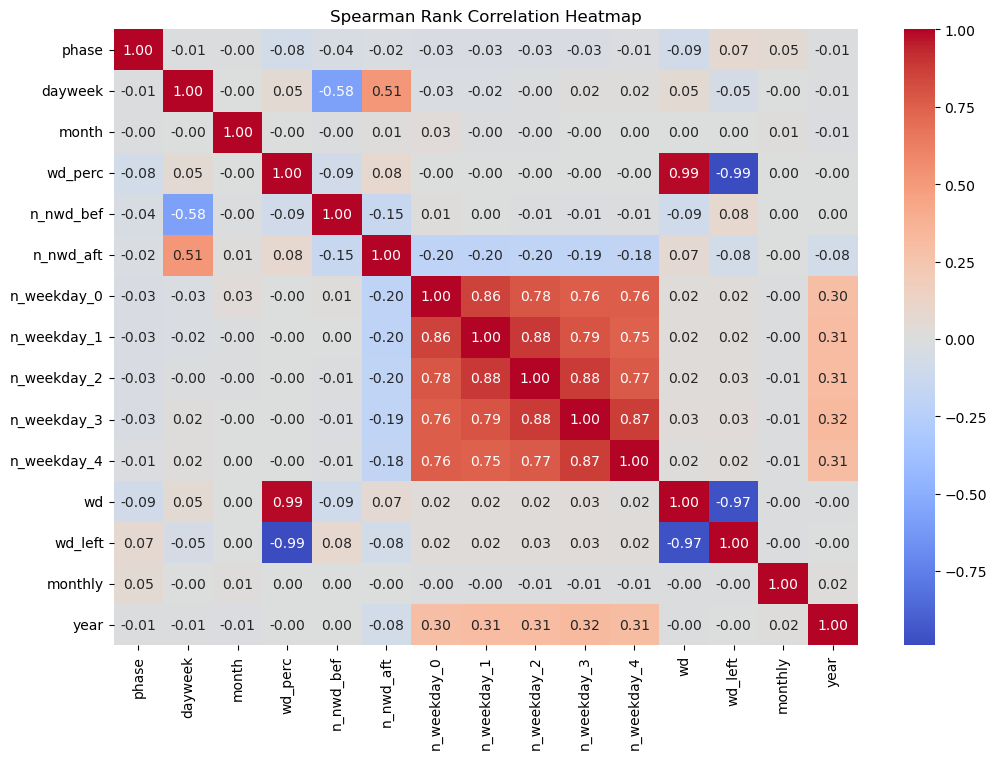

In [36]:
#Tried spearman correlation

# Select only the relevant columns for correlation
numeric_cols = ['phase', 'dayweek', 'month', 'wd_perc',
                'n_nwd_bef', 'n_nwd_aft', 'n_weekday_0', 'n_weekday_1', 
                'n_weekday_2', 'n_weekday_3', 'n_weekday_4', 'wd', 
                'wd_left', 'monthly', 'year']

# Calculate the Spearman's rank correlation matrix
corr_matrix = df[numeric_cols].corr(method='spearman')

# Create the correlation heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Rank Correlation Heatmap')
plt.show()


Checking out the submission data features

In [66]:
df_test = pd.read_parquet('submission_data.parquet')

In [67]:
df_test

,country,brand,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,main_channel
5356,Aldovia,AIMST,0.0,1.0,0.047619,NaN,NaN,2.0,0.0,5,4,4,4,4,2022-01-03,1,20,NaN
5357,Aldovia,AIMST,1.0,1.0,0.095238,NaN,NaN,0.0,0.0,5,4,4,4,4,2022-01-04,2,19,NaN
5358,Aldovia,AIMST,2.0,1.0,0.142857,NaN,NaN,0.0,0.0,5,4,4,4,4,2022-01-05,3,18,NaN
5359,Aldovia,AIMST,3.0,1.0,0.190476,NaN,NaN,0.0,0.0,5,4,4,4,4,2022-01-06,4,17,NaN
5360,Aldovia,AIMST,4.0,1.0,0.238095,NaN,NaN,0.0,2.0,5,4,4,4,4,2022-01-07,5,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11918,Zamunda,ZKKLD,0.0,12.0,0.733333,R,0.00088,2.0,0.0,3,3,3,2,4,2022-12-19,11,4,RETAIL
11919,Zamunda,ZKKLD,1.0,12.0,0.800000,R,0.00088,0.0,0.0,3,3,3,2,4,2022-12-20,12,3,RETAIL
11920,Zamunda,ZKKLD,2.0,12.0,0.866667,R,0.00088,0.0,0.0,3,3,3,2,4,2022-12-21,13,2,RETAIL
11921,Zamunda,ZKKLD,3.0,12.0,0.933333,R,0.00088,0.0,0.0,3,3,3,2,4,2022-12-22,14,1,RETAIL


In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180845 entries, 5356 to 11922
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   country        180845 non-null  object        
 1   brand          180845 non-null  object        
 2   dayweek        180845 non-null  float64       
 3   month          180845 non-null  float64       
 4   wd_perc        180845 non-null  float64       
 5   ther_area      160987 non-null  category      
 6   hospital_rate  160987 non-null  float64       
 7   n_nwd_bef      180845 non-null  float64       
 8   n_nwd_aft      180845 non-null  float64       
 9   n_weekday_0    180845 non-null  int64         
 10  n_weekday_1    180845 non-null  int64         
 11  n_weekday_2    180845 non-null  int64         
 12  n_weekday_3    180845 non-null  int64         
 13  n_weekday_4    180845 non-null  int64         
 14  date           180845 non-null  datetime64[ns]
 15

In [78]:
df_test[(df_test['main_channel'].isnull()) & (df_test['hospital_rate'].isnull())]

,country,brand,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,main_channel
5356,Aldovia,AIMST,0.0,1.0,0.047619,NaN,NaN,2.0,0.0,5,4,4,4,4,2022-01-03,1,20,NaN
5357,Aldovia,AIMST,1.0,1.0,0.095238,NaN,NaN,0.0,0.0,5,4,4,4,4,2022-01-04,2,19,NaN
5358,Aldovia,AIMST,2.0,1.0,0.142857,NaN,NaN,0.0,0.0,5,4,4,4,4,2022-01-05,3,18,NaN
5359,Aldovia,AIMST,3.0,1.0,0.190476,NaN,NaN,0.0,0.0,5,4,4,4,4,2022-01-06,4,17,NaN
5360,Aldovia,AIMST,4.0,1.0,0.238095,NaN,NaN,0.0,2.0,5,4,4,4,4,2022-01-07,5,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31672,Zamunda,FNHPF,0.0,12.0,0.733333,NaN,NaN,2.0,0.0,3,3,3,2,4,2022-12-19,11,4,NaN
31673,Zamunda,FNHPF,1.0,12.0,0.800000,NaN,NaN,0.0,0.0,3,3,3,2,4,2022-12-20,12,3,NaN
31674,Zamunda,FNHPF,2.0,12.0,0.866667,NaN,NaN,0.0,0.0,3,3,3,2,4,2022-12-21,13,2,NaN
31675,Zamunda,FNHPF,3.0,12.0,0.933333,NaN,NaN,0.0,0.0,3,3,3,2,4,2022-12-22,14,1,NaN


In [70]:
df[df.isnull().any(axis=1)]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,...,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel,year
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,...,4,5,5,4,2013-01-02,1,21,0.008092,NaN,2013
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,NaN,NaN,0.0,0.0,...,4,5,5,4,2013-01-03,2,20,0.008092,NaN,2013
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,NaN,NaN,0.0,2.0,...,4,5,5,4,2013-01-04,3,19,0.008092,NaN,2013
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,NaN,NaN,2.0,0.0,...,4,5,5,4,2013-01-07,4,18,0.008092,NaN,2013
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,NaN,NaN,0.0,0.0,...,4,5,5,4,2013-01-08,5,17,0.008092,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525877,ZVLFE,0.010716,Zamunda,0.0,9.0,0.818182,M,NaN,2.0,0.0,...,4,4,5,5,2016-09-26,18,4,0.010540,NaN,2016
3525878,ZVLFE,0.042210,Zamunda,1.0,9.0,0.863636,M,NaN,0.0,0.0,...,4,4,5,5,2016-09-27,19,3,0.010540,NaN,2016
3525879,ZVLFE,0.051639,Zamunda,2.0,9.0,0.909091,M,NaN,0.0,0.0,...,4,4,5,5,2016-09-28,20,2,0.010540,NaN,2016
3525880,ZVLFE,0.065464,Zamunda,3.0,9.0,0.954545,M,NaN,0.0,0.0,...,4,4,5,5,2016-09-29,21,1,0.010540,NaN,2016


In [50]:
# Filter the data for the current species and elevation combination
group_df = df[(df['country']=='Themyscira') & (df['brand'] == 'EUJWP')]
# Sort the DataFrame by the 'Date' column in ascending order
group_df = group_df.sort_values(by='date')
group_df

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,...,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel,year
2831817,EUJWP,0.000000,Themyscira,2.0,1.0,0.045455,A,0.00757,11.0,0.0,...,4,5,5,4,2013-01-02,1,21,0.064667,RETAIL,2013
2831818,EUJWP,0.057841,Themyscira,3.0,1.0,0.090909,A,0.00757,0.0,0.0,...,4,5,5,4,2013-01-03,2,20,0.064667,RETAIL,2013
2831819,EUJWP,0.094534,Themyscira,4.0,1.0,0.136364,A,0.00757,0.0,2.0,...,4,5,5,4,2013-01-04,3,19,0.064667,RETAIL,2013
2831820,EUJWP,0.011172,Themyscira,0.0,1.0,0.181818,A,0.00757,2.0,0.0,...,4,5,5,4,2013-01-07,4,18,0.064667,RETAIL,2013
2831821,EUJWP,0.114971,Themyscira,1.0,1.0,0.227273,A,0.00757,0.0,0.0,...,4,5,5,4,2013-01-08,5,17,0.064667,RETAIL,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833061,EUJWP,0.119752,Themyscira,2.0,2.0,0.789474,A,0.00757,0.0,0.0,...,8,8,8,8,2018-02-21,15,4,0.045623,RETAIL,2018
2833062,EUJWP,0.110119,Themyscira,3.0,2.0,0.842105,A,0.00757,0.0,0.0,...,8,8,8,8,2018-02-22,16,3,0.045623,RETAIL,2018
2833063,EUJWP,0.014874,Themyscira,4.0,2.0,0.894737,A,0.00757,0.0,4.0,...,8,8,8,8,2018-02-23,17,2,0.045623,RETAIL,2018
2833064,EUJWP,0.021526,Themyscira,0.0,2.0,0.947368,A,0.00757,0.0,0.0,...,8,8,8,8,2018-02-26,18,1,0.045623,RETAIL,2018


Country: Themyscira, brand: EUJWP, Stationarity (Before Diff): Stationary, p-value: 6.319593773570376e-19


Text(0, 0.5, 'Phase')

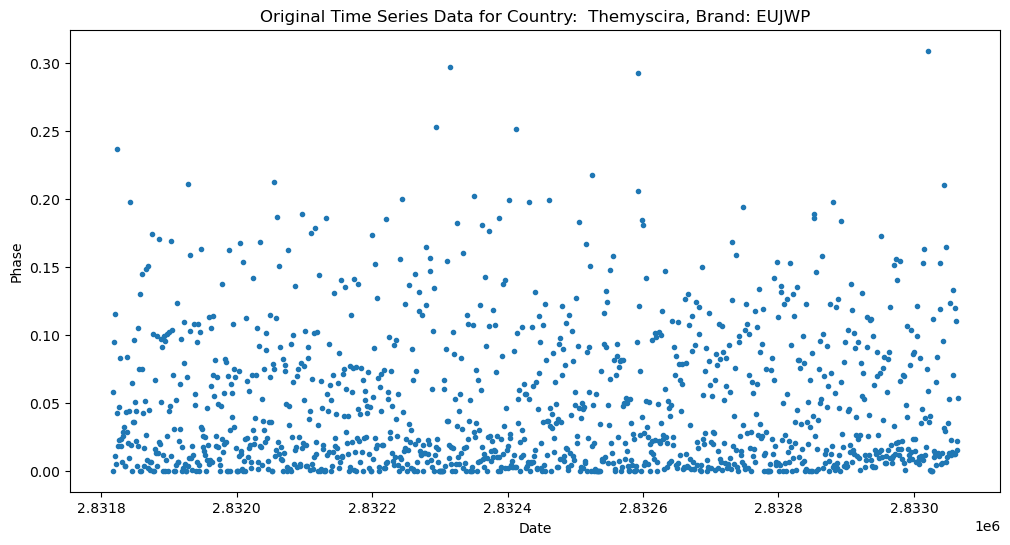

In [42]:
# Check for stationarity before differencing
result_before_diff = sm.tsa.adfuller(group_df['phase'])
is_stationary_before_diff = result_before_diff[1] <= 0.05
stationarity_status_before_diff = 'Stationary' if is_stationary_before_diff else 'Non-Stationary'
print(f"Country: Themyscira, brand: EUJWP, Stationarity (Before Diff): {stationarity_status_before_diff}, p-value: {result_before_diff[1]}")

# Plot the original time series data with dots
plt.figure(figsize=(12, 6))
plt.scatter(group_df.index, group_df['phase'], marker='.', label='Original Data')
plt.title(f'Original Time Series Data for Country:  Themyscira, Brand: EUJWP')
plt.xlabel('Date')
plt.ylabel('Phase')

In [46]:
group_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 2831817 to 2833065
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   brand          1249 non-null   object        
 1   phase          1249 non-null   float64       
 2   country        1249 non-null   object        
 3   dayweek        1249 non-null   float64       
 4   month          1249 non-null   float64       
 5   wd_perc        1249 non-null   float64       
 6   ther_area      1249 non-null   category      
 7   hospital_rate  1249 non-null   float64       
 8   n_nwd_bef      1249 non-null   float64       
 9   n_nwd_aft      1249 non-null   float64       
 10  n_weekday_0    1249 non-null   int64         
 11  n_weekday_1    1249 non-null   int64         
 12  n_weekday_2    1249 non-null   int64         
 13  n_weekday_3    1249 non-null   int64         
 14  n_weekday_4    1249 non-null   int64         
 15  date        

In [68]:
group_df.index = pd.DatetimeIndex(group_df.index).to_period('D')  # Setting up daily frequency

In [81]:
# Example using MinMaxScaler
scaler = MinMaxScaler()
col=['dayweek', 'month', 'n_nwd_bef', 'n_nwd_aft', 'n_weekday_0', 'n_weekday_1', 'n_weekday_2', 'n_weekday_3', 'n_weekday_4', 'wd', 'wd_left']
scaler.fit_transform(group_df[col])
group_df[col] = scaler.fit_transform(group_df[col])
group_df

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,wd,wd_left,monthly,main_channel,year
date,,,,,,,,,,,,,,,,,,,,
2013-01-02,EUJWP,0.000000,Themyscira,0.333333,0.000000,0.045455,A,0.00757,1.000000,0.000000,0.285714,0.142857,0.285714,0.285714,0.142857,0.000000,0.913043,0.064667,RETAIL,2013
2013-01-03,EUJWP,0.057841,Themyscira,0.500000,0.000000,0.090909,A,0.00757,0.000000,0.000000,0.285714,0.142857,0.285714,0.285714,0.142857,0.043478,0.869565,0.064667,RETAIL,2013
2013-01-04,EUJWP,0.094534,Themyscira,0.666667,0.000000,0.136364,A,0.00757,0.000000,0.222222,0.285714,0.142857,0.285714,0.285714,0.142857,0.086957,0.826087,0.064667,RETAIL,2013
2013-01-07,EUJWP,0.011172,Themyscira,0.000000,0.000000,0.181818,A,0.00757,0.181818,0.000000,0.285714,0.142857,0.285714,0.285714,0.142857,0.130435,0.782609,0.064667,RETAIL,2013
2013-01-08,EUJWP,0.114971,Themyscira,0.166667,0.000000,0.227273,A,0.00757,0.000000,0.000000,0.285714,0.142857,0.285714,0.285714,0.142857,0.173913,0.739130,0.064667,RETAIL,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-21,EUJWP,0.119752,Themyscira,0.333333,0.090909,0.789474,A,0.00757,0.000000,0.000000,0.714286,0.714286,0.714286,0.714286,0.714286,0.608696,0.173913,0.045623,RETAIL,2018
2018-02-22,EUJWP,0.110119,Themyscira,0.500000,0.090909,0.842105,A,0.00757,0.000000,0.000000,0.714286,0.714286,0.714286,0.714286,0.714286,0.652174,0.130435,0.045623,RETAIL,2018
2018-02-23,EUJWP,0.014874,Themyscira,0.666667,0.090909,0.894737,A,0.00757,0.000000,0.444444,0.714286,0.714286,0.714286,0.714286,0.714286,0.695652,0.086957,0.045623,RETAIL,2018


In [82]:
group_df['main_channel'].unique()

['RETAIL']
Categories (4, object): ['COMBINED', 'HOSPITAL', 'OTHERS', 'RETAIL']

In [83]:
#group_df.set_index('date', inplace=True)
group_df_train = group_df[:'2017-12-22']
group_df_test = group_df['2018-01-02':]

In [89]:
# Selecting the target and exogenous variables
endog_train = group_df_train['phase']
col1= ['dayweek', 'month', 'wd_perc', 'hospital_rate', 'n_nwd_bef', 'n_nwd_aft', 'n_weekday_0', 'n_weekday_1', 'n_weekday_2', 'n_weekday_3', 'n_weekday_4', 'wd', 'wd_left', 'monthly']
col2= ['dayweek', 'month', 'wd_perc', 'n_nwd_bef', 'n_nwd_aft', 'wd', 'wd_left', 'monthly']
exog_train = group_df_train[col2]  
endog_test = group_df_test['phase']
exog_test = group_df_test[col2]



In [90]:
exog_train

,dayweek,month,wd_perc,n_nwd_bef,n_nwd_aft,wd,wd_left,monthly
date,,,,,,,,
2013-01-02,0.333333,0.0,0.045455,1.000000,0.000000,0.000000,0.913043,0.064667
2013-01-03,0.500000,0.0,0.090909,0.000000,0.000000,0.043478,0.869565,0.064667
2013-01-04,0.666667,0.0,0.136364,0.000000,0.222222,0.086957,0.826087,0.064667
2013-01-07,0.000000,0.0,0.181818,0.181818,0.000000,0.130435,0.782609,0.064667
2013-01-08,0.166667,0.0,0.227273,0.000000,0.000000,0.173913,0.739130,0.064667
...,...,...,...,...,...,...,...,...
2017-12-18,0.000000,1.0,0.750000,0.363636,0.000000,0.478261,0.173913,0.054658
2017-12-19,0.166667,1.0,0.812500,0.000000,0.000000,0.521739,0.130435,0.054658
2017-12-20,0.333333,1.0,0.875000,0.000000,0.000000,0.565217,0.086957,0.054658


PACF and ACF (we need to plot this to understand how our p, q, d forget)

In [98]:
p_values = 3  # Adjust as needed
d_values = 0  # Adjust as needed
q_values = 2  # Adjust as needed

P_values = 3  # Adjust as needed
D_values = 2  # Adjust as needed
Q_values = 2  # Adjust as needed
S_values = 30 #[3]  # Seasonal period (e.g., quarterly data)
start_params = [0.1, 0.1, 0.1, 0.1, 0.1]
# Fit the SARIMAX model
model =sm.tsa.SARIMAX(endog_train, order=(p_values, d_values, q_values), seasonal_order=(P_values, D_values, Q_values, S_values),enforce_stationarity=True, enforce_invertibility=False, exog=exog_train, start_params=start_params)
results = model.fit(maxiter=8000)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.06490D+00    |proj g|=  6.21572D+00


 This problem is unconstrained.



At iterate    5    f= -1.32143D+00    |proj g|=  8.06433D-01

At iterate   10    f= -1.36099D+00    |proj g|=  9.82502D-01

At iterate   15    f= -1.36402D+00    |proj g|=  7.77818D-02

At iterate   20    f= -1.36513D+00    |proj g|=  4.12429D-01

At iterate   25    f= -1.36577D+00    |proj g|=  1.33416D-01

At iterate   30    f= -1.36638D+00    |proj g|=  6.89465D-02

At iterate   35    f= -1.36662D+00    |proj g|=  1.62463D-01

At iterate   40    f= -1.36685D+00    |proj g|=  1.96873D-01

At iterate   45    f= -1.36733D+00    |proj g|=  7.92130D-02

At iterate   50    f= -1.36787D+00    |proj g|=  2.42531D-01

At iterate   55    f= -1.37368D+00    |proj g|=  6.13120D-01

At iterate   60    f= -1.37951D+00    |proj g|=  3.03345D-01

At iterate   65    f= -1.38671D+00    |proj g|=  1.20329D-01

At iterate   70    f= -1.39384D+00    |proj g|=  2.71861D-01

At iterate   75    f= -1.39480D+00    |proj g|=  1.37430D-01

At iterate   80    f= -1.39567D+00    |proj g|=  5.49040D-02

At iter

In [94]:
# Forecasting
forecast = results.get_forecast(steps=len(exog_test))  # exog_future is the future exogenous data

# Print forecast
print(forecast.predicted_mean)

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

In [93]:
exog_test

,dayweek,month,wd_perc,n_nwd_bef,n_nwd_aft,wd,wd_left,monthly
date,,,,,,,,
2018-01-02,0.166667,0.000000,0.047619,0.545455,0.111111,0.000000,0.869565,0.040458
2018-01-03,0.333333,0.000000,0.095238,0.090909,0.000000,0.043478,0.826087,0.040458
2018-01-04,0.500000,0.000000,0.142857,0.000000,0.000000,0.086957,0.782609,0.040458
2018-01-05,0.666667,0.000000,0.190476,0.000000,0.000000,0.130435,0.739130,0.040458
2018-01-08,0.000000,0.000000,0.238095,0.363636,0.000000,0.173913,0.695652,0.040458
2018-01-09,0.166667,0.000000,0.285714,0.000000,0.000000,0.217391,0.652174,0.040458
2018-01-10,0.333333,0.000000,0.333333,0.000000,0.000000,0.260870,0.608696,0.040458
2018-01-11,0.500000,0.000000,0.380952,0.000000,0.000000,0.304348,0.565217,0.040458
2018-01-12,0.666667,0.000000,0.428571,0.000000,0.000000,0.347826,0.521739,0.040458


In [100]:
duplicate_dates = group_df[group_df.index.duplicated()]
print(duplicate_dates)


Empty DataFrame
Columns: [brand, phase, country, dayweek, month, wd_perc, ther_area, hospital_rate, n_nwd_bef, n_nwd_aft, n_weekday_0, n_weekday_1, n_weekday_2, n_weekday_3, n_weekday_4, wd, wd_left, monthly, main_channel, year]
Index: []


/var/folders/dz/j5wssbrn5m11y98nkbpt60kr0000gn/T/ipykernel_48141/1921592078.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  group_df['2013'].plot(y='phase', figsize=(12, 6))


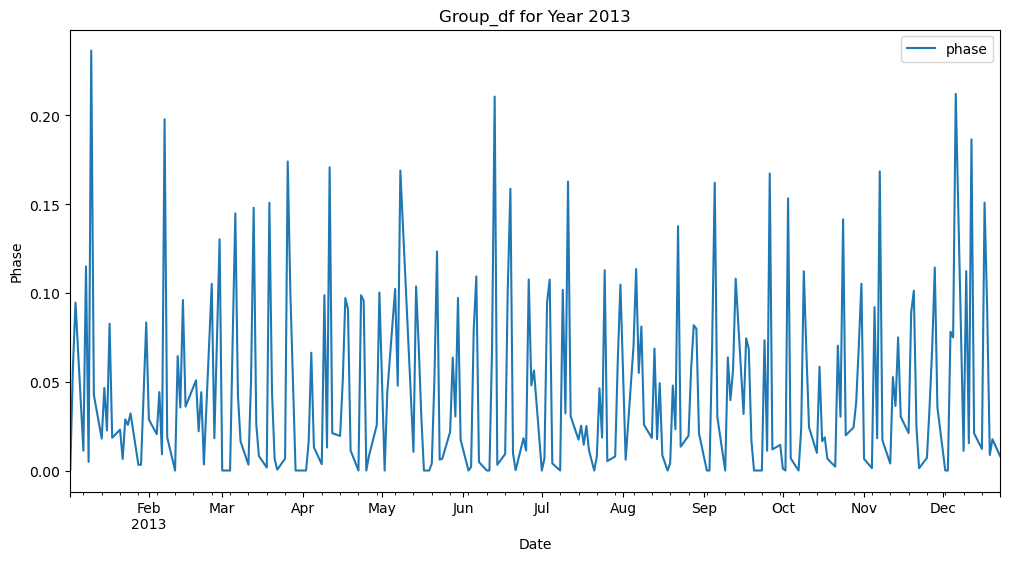

In [101]:
group_df['2013'].plot(y='phase', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Phase')
plt.title('Group_df for Year 2013')
plt.show()
